
Data preprocessing

    If we see given tif files we can see that the actual data lies somewhere along the diagonal of given tif file. Part of file is occupied by zeros(0). We need to omit these. Here I am reading all the TIF files and getting non zero data in form of a dataframe

In [1]:
import rasterio
src = rasterio.open('01.TIF')
array = src.read(1)

height = array.shape[0]
width =  array.shape[1]

print(height,width)

3481 1021


In [2]:
from non_zero_dataframe import sort_tif
final = sort_tif()

'final' is out dataframe witch contains data we need 

In [6]:
final

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band233,band234,band235,band236,band237,band238,band239,band240,band241,band242
10984,1,1,1,1,1,1,1,1283,1337,1322,...,1,1,1,1,1,1,1,1,1,1
10985,1,1,1,1,1,1,1,1331,1388,1323,...,1,1,1,1,1,1,1,1,1,1
12005,1,1,1,1,1,1,1,1377,1343,1351,...,1,1,1,1,1,1,1,1,1,1
12006,1,1,1,1,1,1,1,1314,1300,1322,...,1,1,1,1,1,1,1,1,1,1
12007,1,1,1,1,1,1,1,1485,1431,1398,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543112,175,175,175,175,175,175,175,1663,1667,1609,...,1,1,1,1,1,1,1,1,1,1
3543113,1,1,1,1,1,1,1,1440,1488,1368,...,1,1,1,1,1,1,1,1,1,1
3543114,1,1,1,1,1,1,1,1401,1457,1422,...,1,1,1,1,1,1,1,1,1,1
3544134,1822,1822,1822,1822,1822,1822,1822,3293,3357,3331,...,1,1,1,1,1,1,1,1,1,1


Now next step is to reduce dimentions of 242 bands using Principle Component Analysis, and analyse the principle components also decide how many principle components (PC1, PC2 ..) to choose.

To choose the number of principle components I am Plotting varience as follows:

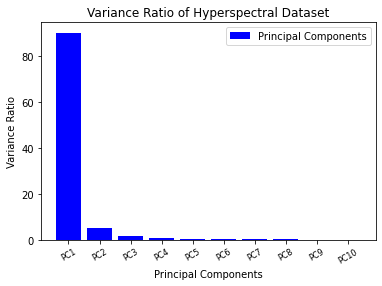

In [7]:
# Plot varience:
from matplotlib import pyplot as plt


n=[]
ind=[]
for i in range(242):     # 242 = number of bands
    n.append(i+1)
for i in range(242):
    ind.append('band'+str(n[i]))

features = ind
x = final.loc[:, features].values
from sklearn.preprocessing import MinMaxScaler
scaler_model = MinMaxScaler()
scaler_model.fit(x.astype(float))
x=scaler_model.transform(x)
from sklearn.decomposition import PCA


## Finding the principle components
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
ev=pca.explained_variance_ratio_
#--------- Bar Graph for Explained Variance Ratio ------------
plt.bar([1,2,3,4,5,6,7,8,9,10],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
pc=[]
for i in range(10):
    pc.append('PC'+str(i+1))
#plt.xticks([1,2,3,4,5,6,7,8,9,10],pc, fontsize=8, rotation=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10],pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of Hyperspectral Dataset')
plt.show()


We see that the diffrence in varience is noticable from PC1, PC2, PC3 and PC4. After PC4 the diffrence is non noticable. Hence we choose number of components = 4 

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
dt = pca.fit_transform(final.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt)] )


In [9]:
q    # PCA output

,0,1,2,3
0,6814.780424,-332.830484,-206.650796,197.733113
1,6741.775243,-428.781942,-360.523702,65.679532
2,6409.903380,-168.592003,-76.651316,78.701464
3,6257.681496,-417.128808,-148.292866,-224.375033
4,6365.004190,63.055796,-299.163017,-155.554388
...,...,...,...,...
858440,-3427.794635,478.766824,-430.803272,421.606983
858441,-3791.328604,-486.350645,172.767958,198.883799
858442,-3655.448807,-468.441738,205.508697,92.727989
858443,-377.354627,9026.288777,-6262.722989,800.963874


Now lets plot Principle components on a graph

Text(0.5, 0, 'PC3')

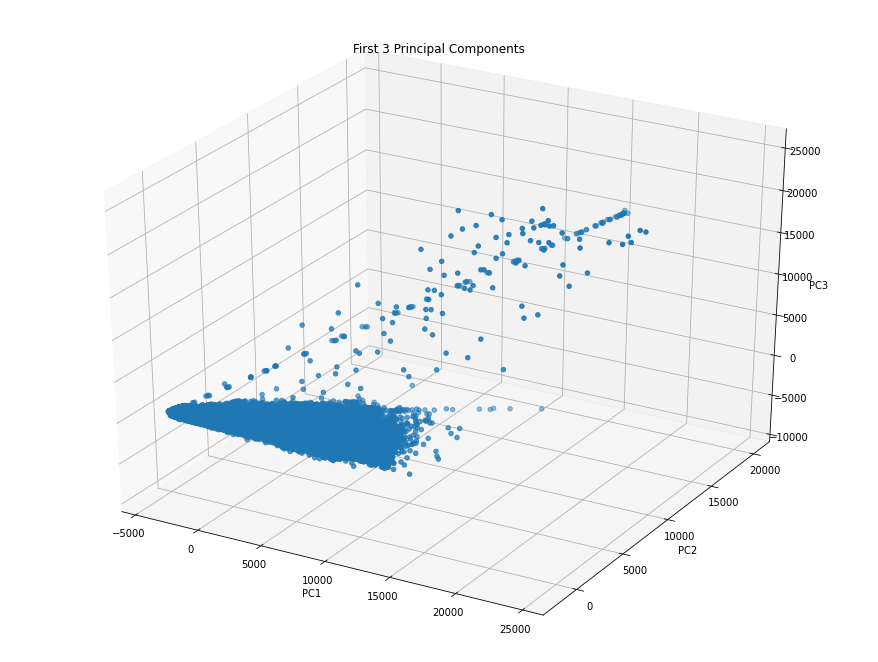

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = q.iloc[:,1]
x = q.iloc[:,0]
z = q.iloc[:,2]


ax.scatter(x,y,z)#, c=c, cmap='coolwarm')
plt.title('First 3 Principal Components')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_zlabel('PC3')
# plt.legend()

Once I have plotted principle components on graph. I need to cluster them and seperate the number of classes. To find the number of clusters I use The Elbow method

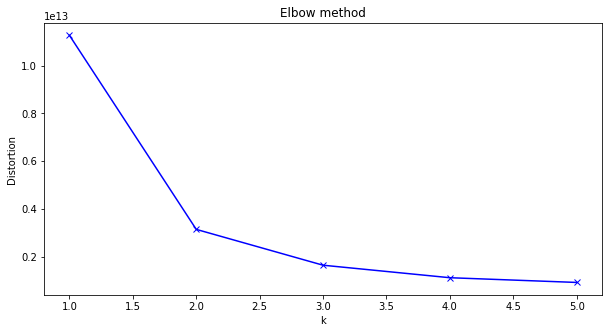

In [11]:
from sklearn.cluster import KMeans

distortions=[]

K = range(1,6)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init=50, max_iter =500)
    kmean.fit(q)
    distortions.append(kmean.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

In order to identify optimal clusters I have used the Elbow method. In this method when the slope of the tangent becomes almost horizhontal. That is the optimal number of clusters. So above we have 4 optimal clusters

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

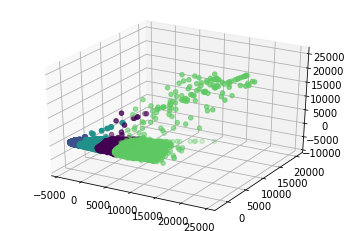

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(q)
labels = kmeans.predict(q)

fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,5),alpha=0.8) 

#Equally spaced color 
for i in range(5): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(x.iloc[k])
            yL.append(y.iloc[k])
            zL.append(z.iloc[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [13]:
index = final.index.tolist() 
# index

In [14]:

a= np.array(index)
# a

In [15]:
dataset = pd.DataFrame({'count': a, 'labels': labels})


In [16]:
dataset.set_index('count', inplace = True)


Now I have plotted the labels against their index. 

IMPORTANT : earlier when we had flattened the image it got converted into 1-D . The index of each pixel represents the position of each pixel in both flattened and non flattened image.

Hence I associate knn-labels to count(position of that pixel)

In [17]:
dataset

,labels
count,
10984,3
10985,3
12005,3
12006,3
12007,3
...,...
3543112,1
3543113,1
3543114,1


In [18]:
res = dataset['labels'].value_counts()
res

1    356881
0    222061
2    207196
3     72307
Name: labels, dtype: int64

In [19]:
def reshaped_coords(a):
    '''
        reshaped_coords takes in index of a label and outputs
        its pixel location on orignal image
    '''
    q,r = divmod(a,width)
    y_coord = q
    x_coord = r
    return (x_coord, y_coord)


Now we omit class 0 and take class 1,2 and 3

In [20]:
Index_label_class1 = dataset[dataset['labels']==1].index.tolist()  
Index_label_class2 = dataset[dataset['labels']==2].index.tolist() 
Index_label_class3 = dataset[dataset['labels']==3].index.tolist() 


In [21]:

class_1_list=[]
for values in Index_label_class1:
  coords = reshaped_coords(values)
  class_1_list.append(coords)

class_2_list=[]
for values in Index_label_class2:
  coords = reshaped_coords(values)
  class_2_list.append(coords)

class_3_list=[]
for values in Index_label_class3:
  coords = reshaped_coords(values)
  class_3_list.append(coords)


Finally we plot the clustered pixels using KNN on a jpg image

In [22]:
import cv2
import numpy as np

# width = 1021
# height = 3481
#3481, 1021
# Make empty black image of size (100,100)
img = np.zeros((height, width, 3), np.uint8)

red = [0,0,255]
green = [0,255,0]
blue = [255,0,0]

for values in class_1_list:
#   print(values[1], values[0])

  img[values[1],values[0]] = blue

cv2.imwrite('img1.png', img)

for values in class_2_list:
#   print(values[1], values[0])

  img[values[1],values[0]] = green

cv2.imwrite('img2.png', img)


for values in class_3_list:
#   print(values[1], values[0])

  img[values[1],values[0]] = red

cv2.imwrite('img3.png', img)



True

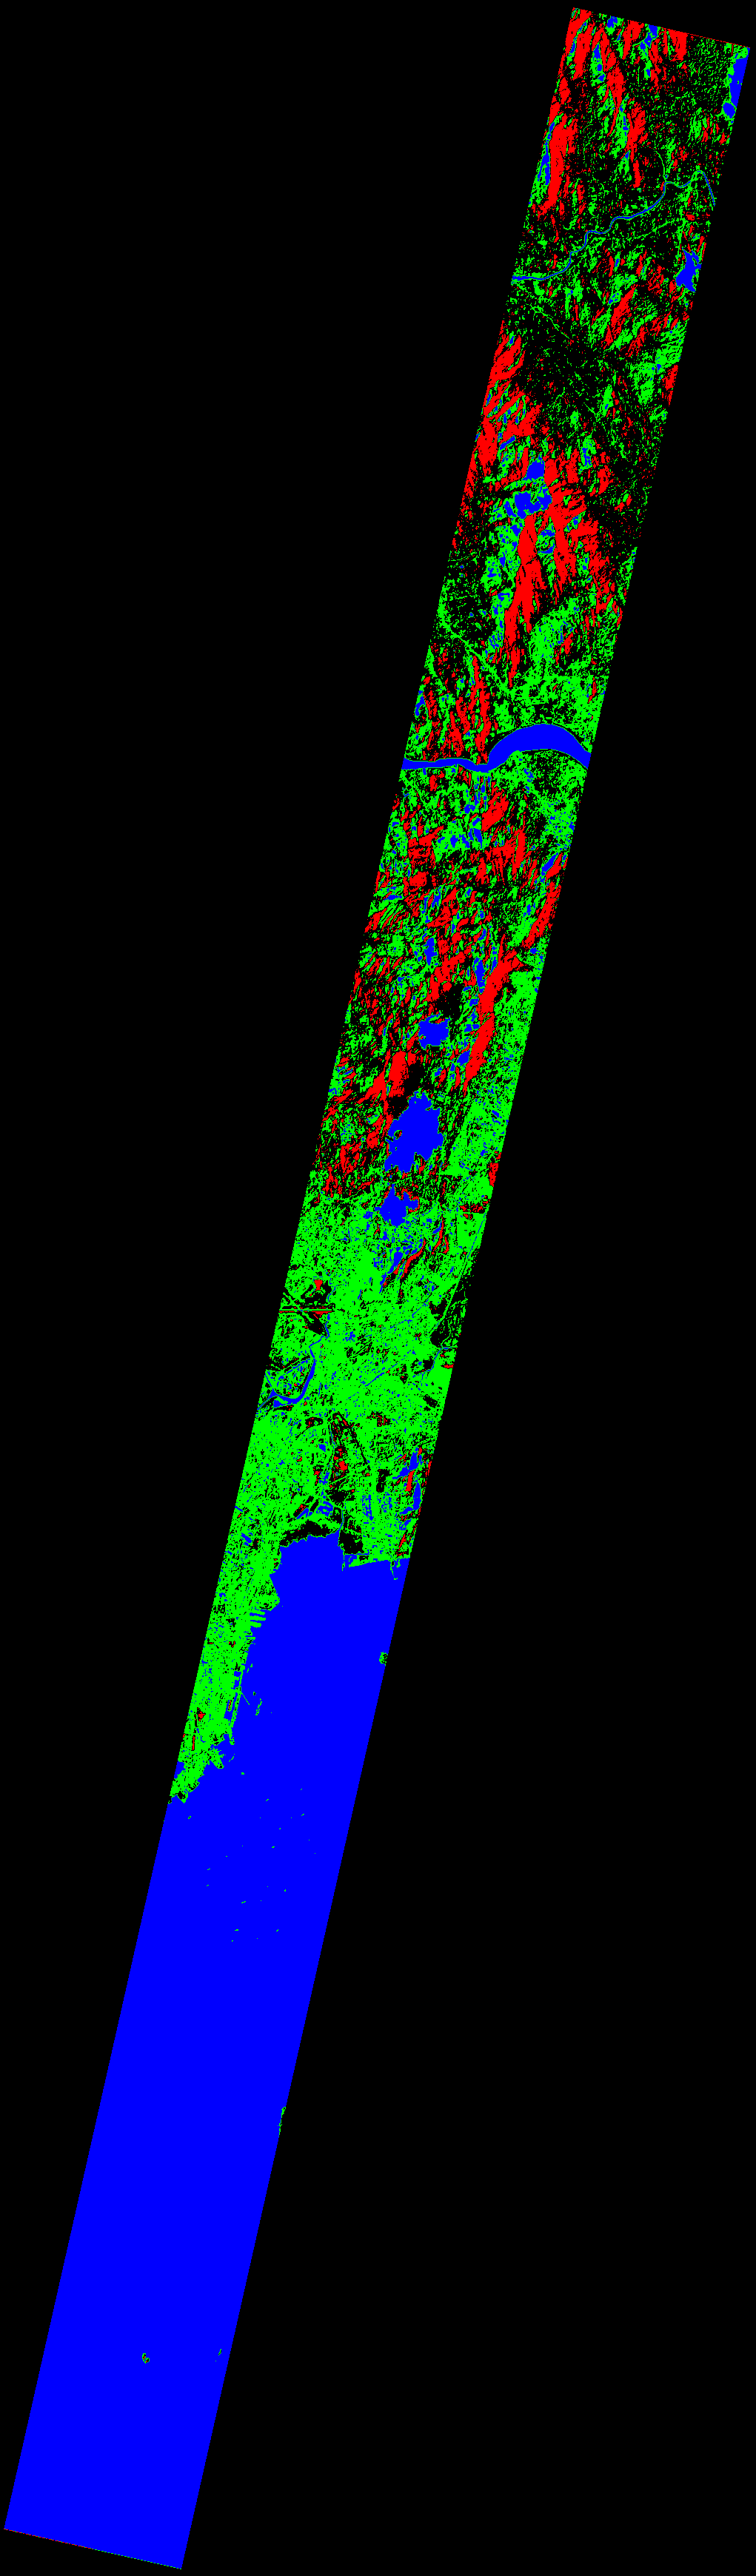

In [23]:
from IPython.display import Image 
pil_img = Image(filename='img3.png')
display(pil_img)

The Result image is seperated into 3 classes water(blue), grassland(green) and mountain(red) as shown above

Using GDAL its possible to convert the plotted pixels to lat-lon coordinates. These lat-lon will be useful for plotting on google earth maps the function used to do that is as follows:

In [31]:

import gdal
def pix_to_lat_lon(x,y):
    '''
        Takes in pixel location of tiff file and outputs 
        latitude and longitude
    '''
    ds = gdal.Open('02.TIF')
    xoff, a, b, yoff, d, e =ds.GetGeoTransform()
    xp=a * x + b * y +xoff
    yp = d *x +e * y+yoff
    return(xp,yp)

In [32]:
pix_to_lat_lon(468,1758)

(277726.24877571006, 2112375.1508187302)